# Kernel Ridge Regression: Sine Data Set

In [1]:
from matplotlib import cm
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics.pairwise import pairwise_distances
import numpy as np

## Generate the Sine Data Set

In [2]:
np.random.seed(0)
x = np.linspace(0,24,200).reshape(-1,1)
y = np.sin(x) + 0.5*(np.random.rand(x.size,1) - 0.5)

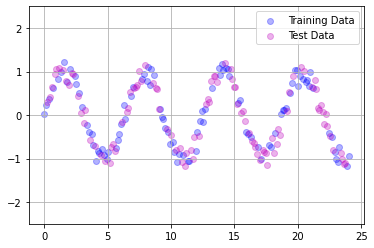

In [3]:
# Option 1: Random 100 for training, random 100 for testing
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.5, random_state=0)

# Option 2: First 100 for training, next 100 for testing
# X_train, X_test, y_train, y_test = x[:100], x[100:], y[:100], y[100:]

# Option 3: First 50 and last 50 for training, middle 100 for testing
# X_train, X_test, y_train, y_test = np.concatenate([x[:50], x[150:]]),x[50:150],\
#                                    np.concatenate([y[:50], y[150:]]),y[50:150]


def plotData(X_train,X_test,y_train,y_test):
    plt.scatter(X_train,y_train,color='b',alpha=0.3,label='Training Data')
    plt.scatter(X_test,y_test,color='m',alpha=0.3,label='Test Data')
    plt.ylim([-2.5, 2.5])
    plt.grid()
    
plotData(X_train, X_test, y_train, y_test)
plt.legend()
plt.show()

## Train KRR model for Sine Data Set

In [4]:
class KernelRidgeReg:
    def __init__(self, X_train, y_train, reg = 0.1, kw = 2):
        self.X_train = X_train
        self.y_train = y_train
        self.N_train = X_train.shape[0]
        self.reg = reg
        self.kw = kw
        self.K = self.kernel_func(X_train,X_train)
        
    def kernel_func(self, x1, x2):
        return np.exp(-pairwise_distances(x1, x2, metric='sqeuclidean') / self.kw ** 2)

    def predict(self, x):
        # For k(x), a single sample x should be reshaped for pairwise distances to work 
        kx = self.kernel_func(x.reshape(1,-1),X_train)
        
        return kx @ np.linalg.inv(self.K + self.reg * np.eye(self.N_train)) @ self.y_train

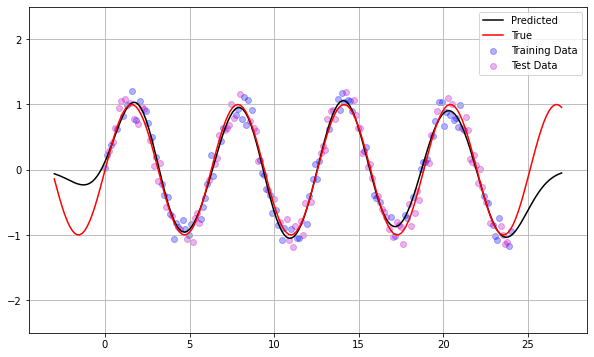

In [5]:
krr = KernelRidgeReg(X_train, y_train)
x_fine = np.linspace(-3,27,200)
y_pred = np.zeros(x_fine.shape)
y_true = np.sin(x_fine)
for i in range(len(x_fine)):
    y_pred[i] = krr.predict(x_fine[i])

plt.figure(figsize=(10,6))
plotData(X_train, X_test, y_train, y_test)
plt.plot(x_fine,y_pred,c='k',label='Predicted')
plt.plot(x_fine,y_true,c='r',label='True')
plt.legend()
plt.show()

## Evaluate the model performance

In [6]:
N_train = y_train.shape[0]
N_test = y_test.shape[0]

y_train_pred, y_test_pred = np.zeros((N_train,1)), np.zeros((N_test,1))
for i in range(N_train):
    y_train_pred[i] = krr.predict(X_train[i,:])
for i in range(N_test):
    y_test_pred[i] = krr.predict(X_test[i,:])

y_train_MSE = np.sum((y_train_pred - y_train) ** 2)
y_train_R2 = 1 - y_train_MSE/np.sum((y_train - np.mean(y_train)) ** 2)
y_train_MSE /= N_train

y_test_MSE = np.sum((y_test_pred - y_test) ** 2)
y_test_R2 = 1 - y_test_MSE/np.sum((y_test - np.mean(y_test)) ** 2)
y_test_MSE /= N_test

print(f"  Training MSE:\t{y_train_MSE}")
print(f"  Test MSE:\t{y_test_MSE}")
print(f"  Training R2:\t{y_train_R2}")
print(f"  Test R2:\t{y_test_R2}")

  Training MSE:	0.015567253676046644
  Test MSE:	0.024024129290705618
  Training R2:	0.9714032608748161
  Test R2:	0.9543417612630964
